In [1]:
# Question: does maximizing classification accuracy via binary cross-entropy maximize the asimov significance? 

# Asking because we often optimize our classifiers on classification accuracy, but various cuts by maximizing significance
# What regions are they equivalent, are there cases where one is better than the other? 
# E.g. maybe there are some regions where we care more about the accuracy and some regions where we care less about the accuracy
# Motivation for incorporating significance into the loss function? 

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
%matplotlib notebook
from matplotlib.widgets import Slider # slider because why not?

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100 

In [44]:
def plot_significance_metrics(bkg,sig):
    "Given an signal and background input distributions, where signal is above bkg plot various significance metrics"
    
    logloss = []
    s_splusb = []
    asimov = []
    sigs = []
    bkgs = []
    my_range = (0,100)
    range_cuts = np.arange(1,100,1)
    
    fig, (ax1,ax2) = plt.subplots(2,1) # set up plots 
    
    # Plot histograms of distributions in upper panel
    ax1.hist(sig,bins=50,range=my_range,alpha=0.6,#density=True,
             label = "Signal",color='C1')
    ax1.hist(bkg,bins=50,range=my_range,alpha=0.6,#density=True,
             label = "Background",color='C0')
    ax1.set_xlim(0,100)
    ax1.set_ylabel("p(x)")
    ax1.legend(frameon=False)#,bbox_to_anchor=(2.05, 1))
    
    
    for cut_value in range_cuts: 
        # Move cut from low to high selecting everything to the right as "signal"
    
        x = np.append(bkg,sig) # put all events into one vector
        y_true = np.append(np.zeros(len(bkg)),np.ones(len(sig))) # make vector of true signal (1) or background (0)
        y_pred = np.where(x > cut_value, 1, 0) # select all events where x > cut as predicted signal 
        
        # calculate log loss 
        logloss += [log_loss(y_true, y_pred)]
        
        # calculate number of signal and background events in signal region 
        s = np.sum(np.where(np.logical_and(y_pred == 1,y_true == 1),1,0)) # selected s
        b = np.sum(np.where(np.logical_and(y_pred == 1,y_true == 0),1,0)) # selected b
        
        # put in a small value here to avoid divide by 0 issues
        if s == 0.0:
            s = 1e-5
        if b == 0.0:
            b = 1e-5
        
        # save for later plotting 
        sigs += [s]
        bkgs += [b]
        
        # calculate s/(s+b)
        s_splusb += [s*1.0/np.sqrt(b)]
        
        # calculate asimov significance
        asimov += [np.sqrt(2*(s+b)*np.log(1+s*1.0/b)-s)]
        
        #print(cut_value, s, b)
   
    # initialize slider  at minimum of log loss
    cut_value_init = range_cuts[logloss.index(min(logloss))]
    
    # Line plot of significance metrics in lower panel
    ax2.plot(range_cuts,logloss/max(logloss),label = "Normalized log loss")
    ax2.plot(range_cuts,s_splusb/max(s_splusb),label="Normalized s/sqrt(b)")
    ax2.plot(range_cuts,asimov/max(asimov),label = "Normalized Asimov ")
    #ax2.plot(range_cuts,sigs/max(sigs),label = "Signal")
    #ax2.plot(range_cuts,bkgs/max(bkgs),label = "Background")

    ax2.set_ylabel("Significance Metric")
    ax2.legend(frameon=False,loc="upper right")#, bbox_to_anchor=(1.05, 1))
    ax2.set_xlim(0,100)
    
    # Plot lines for slider 
    line = ax1.axvline(x=cut_value_init,color='black',linestyle='--',alpha=0.6)
    line2 = ax2.axvline(x=cut_value_init,color='black',linestyle='--',alpha=0.6)
    
    # General plot formatting
    plt.xlabel("x")
    plt.subplots_adjust(left=0.25, bottom=0.25)
    
    # Set up slider
    axcut = plt.axes([0.25, 0.1, 0.65, 0.03])
    cut_slider = Slider(
        ax=axcut,
        label='Cut value',
        valmin=my_range[0],
        valmax=my_range[1],
        valinit=cut_value_init,
    )
    
    def update(val): # Updates the slider line
        line.set_xdata(cut_slider.val)
        line2.set_xdata(cut_slider.val)
        fig.canvas.draw_idle()
        
    # register the update function with each slider
    cut_slider.on_changed(update)
    
    plt.show()

<IPython.core.display.Javascript object>


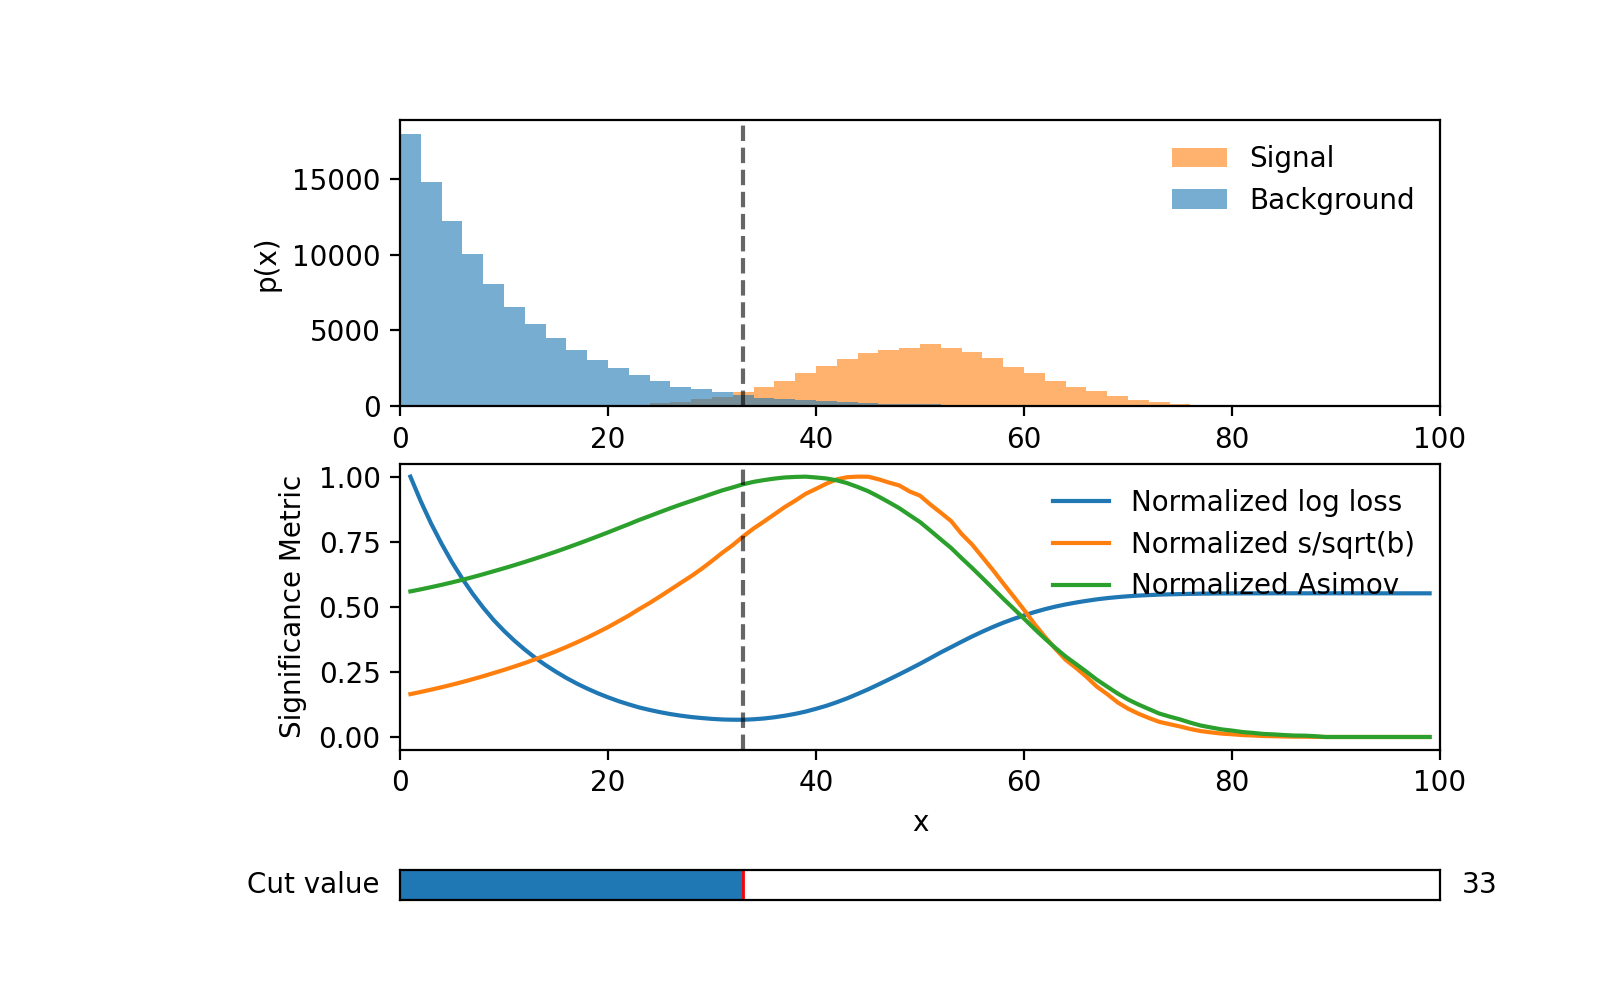

In [45]:
bkg  = np.random.exponential(scale=10, size=100000) # background
sig = np.random.normal(loc=50, scale=10, size=50000) # signal
plot_significance_metrics(bkg,sig)

<IPython.core.display.Javascript object>


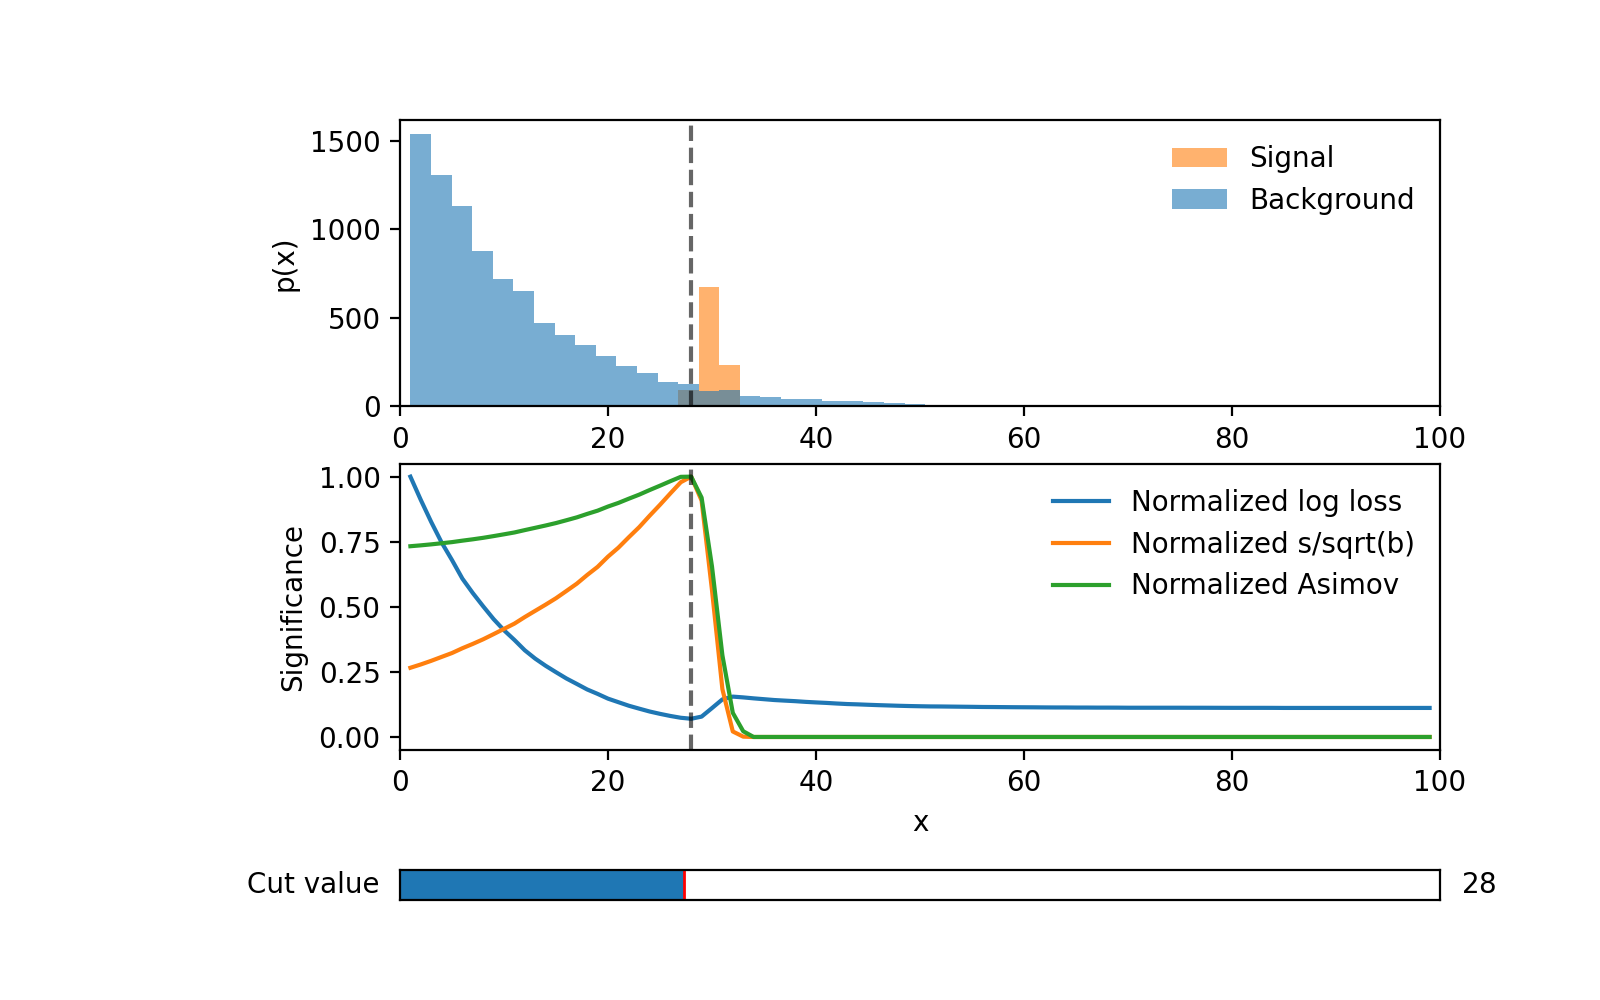

In [36]:
bkg = np.random.exponential(scale=10, size=10000)  # background
sig = np.random.normal(loc=30, scale=1.0, size=1000) # signal
plot_significance_metrics(bkg,sig)

<IPython.core.display.Javascript object>


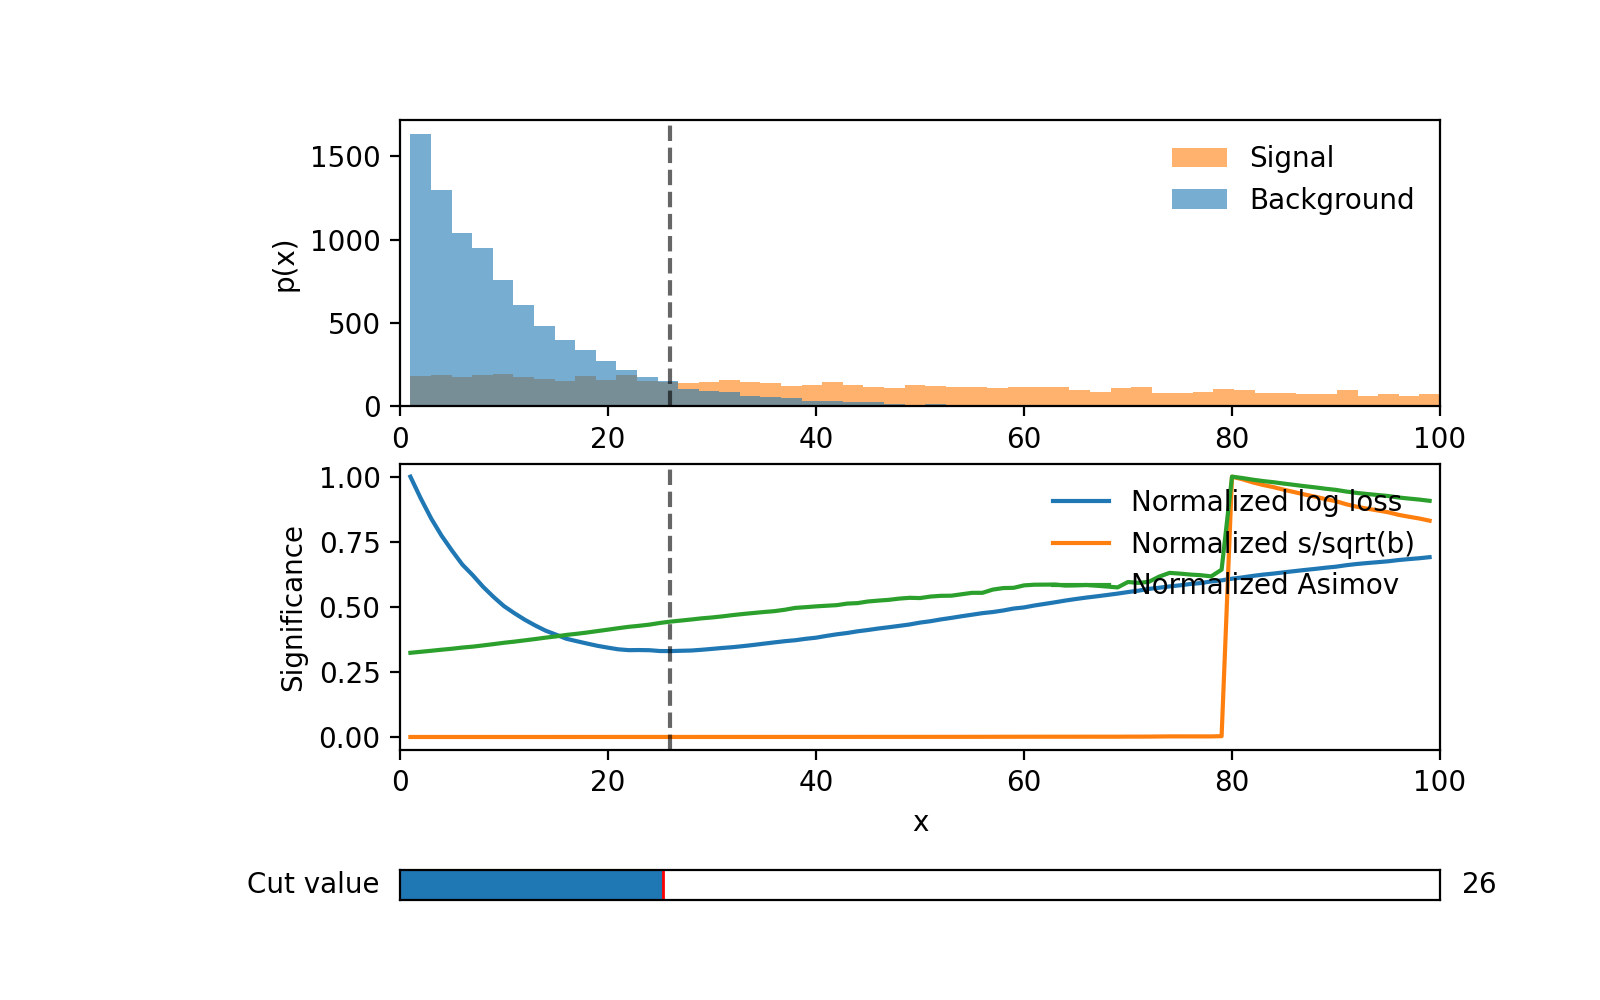

In [37]:
bkg = np.random.exponential(scale=10, size=10000)  # background
sig = np.random.exponential(scale=100.0, size=10000) # signal
plot_significance_metrics(bkg,sig)

<IPython.core.display.Javascript object>


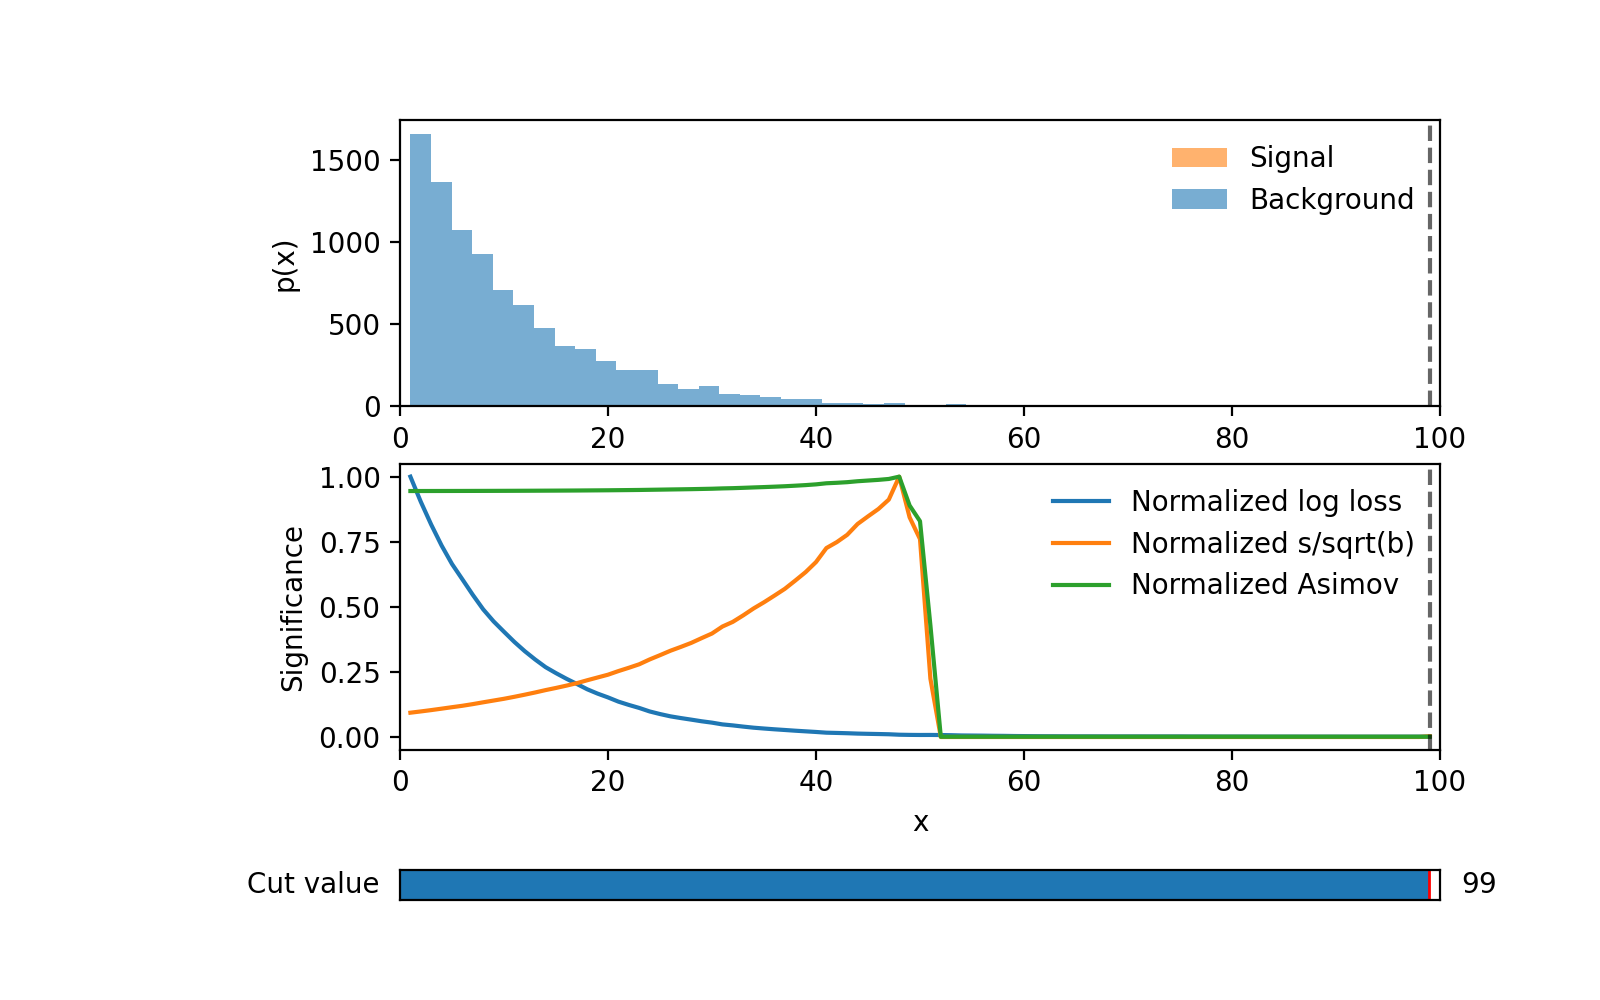

In [38]:
bkg = np.random.exponential(scale=10, size=10000)  # background
sig = np.random.normal(loc=50, scale=1.0, size=10) # signal
plot_significance_metrics(bkg,sig)


<IPython.core.display.Javascript object>


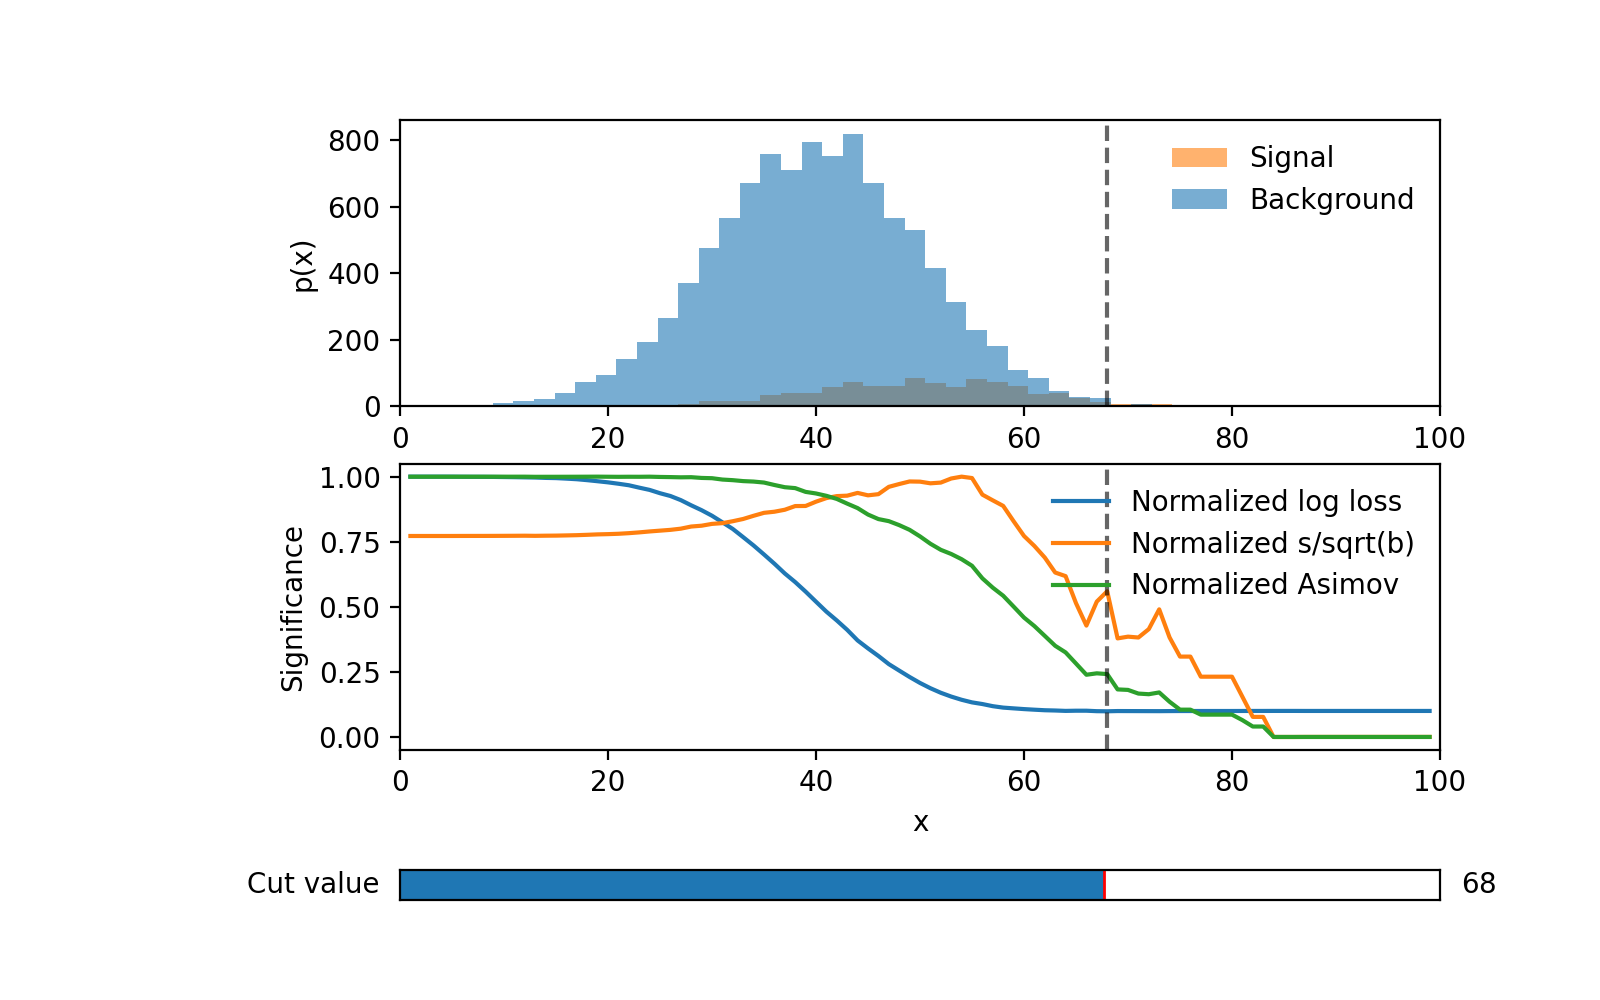

In [43]:
bkg = np.random.normal(loc=40, scale=10.0, size=10000)  # background
sig = np.random.normal(loc=50, scale=10.0, size=1000) # signal
plot_significance_metrics(bkg,sig)

### Thoughts

- s/$\sqrt(b)$ is much more sensitive to fluctuations 
- don't always agree with eachother, especially when signal is small  